# Bonus


Flight Price Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#Reading dataset
flight_price=pd.read_csv("./datasets/flight_price_prediction.csv",index_col = False)

In [3]:
# Removing of unnamed and flight columns
flight_price.drop(['Unnamed: 0','flight'],axis = 1, inplace = True)

In [4]:
#Converting Categorical Columns to numerical columns
flight_price = pd.get_dummies(flight_price)

In [5]:
flight_price

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10.42,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13.83,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10.00,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [6]:
# normalizing the numerical columns
numcols =['duration', 'days_left']
for i in numcols:
    flight_price[i] = (flight_price[i]-flight_price[i].min())/(flight_price[i].max()-flight_price[i].min())

In [7]:
# Removing of flight and stops column
flight_price.drop('stops_zero',axis = 1,inplace = True)

In [8]:
# Split data into test and train
flight_price = flight_price.sample(frac=1)
train_data = flight_price[0:int(len(flight_price)*0.8)]
test_data = flight_price[int(len(flight_price)*0.8):]

In [9]:
# Printing the shapes of X_train,y_train, X_test, y_test
X_train = np.array(train_data.drop('price',axis = 1))
y_train = np.array(train_data['price']).reshape(-1,1)
X_test = np.array(test_data.drop('price',axis = 1))
y_test = np.array(test_data['price']).reshape(-1,1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (240122, 36)
Shape of y_train: (240122, 1)
Shape of X_test: (60031, 36)
Shape of y_test: (60031, 1)


## Ridge Regression with gradient descent

In [10]:
class LinearReg():
    def __init__(self, learning_rate,number_of_iterations,lambda_val):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.lambda_val = lambda_val

    def cost(self,y_true,y_pred):
        MSE_loss = (np.dot((y_true-y_pred).T,(y_true-y_pred))/len(y_true)) + (0.5*self.lambda_val*np.dot(self.w.T,self.w))
        return MSE_loss[0][0]   

    def gradient_descent(self,x,y_true,y_pred):
        # Define Gradient Descent
        delta = y_pred-y_true
        gW = np.dot(x.T,delta)/(2*x.shape[0])
        return gW
    
    def fit(self,X,y):
        #model training by optimizing weights using cost function and gradient descent
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)+self.lambda_val*np.identity(X_train.shape[1])),X.T),y)
        loss = []
        for i in range(self.number_of_iterations):
            pred = np.dot(X,self.w)
            gW = self.gradient_descent(X,y,pred)
            self.w -= self.learning_rate*(gW)
            J = self.cost(y,pred)
            loss.append(J)
        print("Weights",self.w)
        plt.plot(loss)
        plt.title("Loss at every iteration")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Loss")
        
    def predict(self, X):
        #predictions for new data
        pred = np.dot(X,self.w)
        return pred

In [11]:
def MSE_Loss(y_true,y_pred):
    return np.dot((y_true-y_pred).T,(y_true-y_pred))/len(y_true)

Weights [[  2078.78655792]
 [ -6292.03862872]
 [  1368.32465393]
 [  1480.55833848]
 [  3085.83247049]
 [  3482.12896122]
 [  3697.52993278]
 [  5454.9288552 ]
 [  3383.21663884]
 [  3306.26202474]
 [  2001.12286598]
 [  1710.26907974]
 [  4980.694265  ]
 [  3187.73846486]
 [  2268.0900696 ]
 [  3125.90533958]
 [  3038.02264945]
 [  3976.90789823]
 [  3152.18749525]
 [  3008.18976828]
 [  7557.70379213]
 [  9664.34218242]
 [  2658.85678386]
 [  1818.31883596]
 [  3574.31904977]
 [  3596.23735405]
 [  3131.17299226]
 [  3790.39832252]
 [  3451.19189258]
 [  3247.65885345]
 [  1868.76995953]
 [  1747.7849824 ]
 [  4832.14407341]
 [  3421.75342498]
 [ 31742.87045498]
 [-13173.56719812]]
Mean Squared Loss for train data: 45396451.492745064
Mean Squared Loss for test data: 46501280.90321101
Time Taken for training: 605.7866659164429


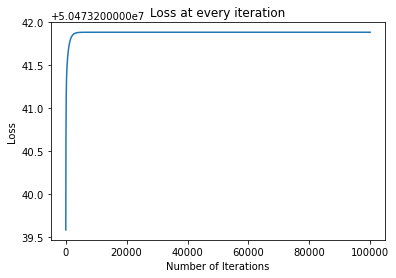

In [12]:
# model training and predictions with learning rate = 1e-3,number of iterations = 100000
start_time = time.time()
model = LinearReg(0.5,100000,0.006)
model.fit(X_train,y_train)
end_time = time.time()
y_pred_train = list(model.predict(X_train))
y_pred = list(model.predict(X_test))
print('Mean Squared Loss for train data:',MSE_Loss(y_train,y_pred_train)[0][0])
print('Mean Squared Loss for test data:',MSE_Loss(y_test,y_pred)[0][0])
print('Time Taken for training:',end_time-start_time)

In [13]:
# save weights as pickle file
pickle.dump(model, open('keerthyp_syanamad_assignment1_gradientdescent_bonus.pkl', 'wb'))